# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Actividad Semana 5

### **Vectores Embebidos Pre-entrenados: Fasttext**

#### **Nombres y matrículas de los integrantes del equipo:**



*   Juan Carlos Villamil Rojas - A01794003
*   Yeison Fernando Villamil Franco - A01793803
*   Daniel Isai Yañez Torres - A00823363
*   Isaac Francisco Viramontes Castillo - A01793679
*   Kurt Yañez Badelt - A00394053




In [30]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [31]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Leer los archivos de texto y cargarlos en dataframes  
df_amazons5 = pd.read_csv('amazon5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')
df_imdb5 = pd.read_csv('imdb5.txt', sep='\t', names=['text'], header=None, encoding='utf-8')
df_imdb5['review'] = df_imdb5['text'].apply(lambda x: x.split('\t')[0][:-1])
df_imdb5['label'] = pd.to_numeric(df_imdb5['text'].apply(lambda x: x.split('\t')[0][-1]))
df_imdb5 = df_imdb5.drop(columns=['text'])
df_yelp5 = pd.read_csv('yelp5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')

# Concatenar los dataframes
df = pd.concat([df_amazons5, df_imdb5, df_yelp5], axis=0)

# *********** Aquí termina la sección de agregar código *************


In [32]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


In [33]:
# Y veamos sus primeros registros:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## **Pregunta - 2:**

Realiza el proceso de limpieza.

Aplica el preprocesamiento que consideres adecuado, sin embargo, deberás aplicar necesariamente alguna de las técnicas de lematización.











In [34]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to /home/kurt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kurt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
class cleaning:
    
    def clean_tok(doc, mystopwords):
        # # Reemplazamos los valores que son '10/10' por el témino 'ten/ten'
        doc = doc.replace('10/10', 'ten/ten')
        # Removemos los caracteres especiales
        pattern = r'[^a-zA-Z\s]'
        doc = re.sub(pattern, ' ', doc)
        # Considerar solo las palabras mayores a uno
        doc = ' '.join([word for word in doc.split() if len(word) > 1])
        # Se parasaran todas las palabras a minusculas
        doc = doc.lower()
        # Eliminamos stopwords
        doc = ' '.join([word for word in doc.split() if word not in (mystopwords)])
        # tokens para cada comentario
        tokens = doc.split()

        return tokens

    def clean_doc(doc):
        # Instanciamos el lemmatizador a ser usado
        wnl = WordNetLemmatizer()
        # Aplicamos la lematización
        verbs = [wnl.lemmatize(word, 'v') for word in doc]
        nouns = [wnl.lemmatize(word, 'n') for word in verbs]
        adj = [wnl.lemmatize(word, 'a') for word in nouns]
        tokens = [wnl.lemmatize(word, 'r') for word in adj]
        return tokens

In [36]:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
mystopwords = [word for word in stopwords.words('english') if word not in negwords]
Xcleantok = [cleaning.clean_tok(x, mystopwords) for x in df.review]   
Xclean = [cleaning.clean_doc(x) for x in Xcleantok]


# *********** Aquí termina la sección de agregar código *************

In [37]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['no', 'way', 'plug', 'u', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tie', 'charger', 'conversation', 'last', 'minute', 'major', 'problem']
['mic', 'great']


# **Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:

# ************* Inicia la sección de agregar código:*****************************

#Separamos los datos en conjuntos de entrenamiento, validación y prueba
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, df.label, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


# **Pregunta - 4:**



Construye tu vocabulario a continuación


In [40]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# a. Usa el conjunto de entrenamiento para generar tu vocabulario con un tamaño que consideres adecuado:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Generamos el vocabulario
min_freq = {}
# Contamos la frecuencia de las palabras
for x in x_train:
    for w in x:
        min_freq[w] = min_freq.get(w, 0) + 1

# Obtenemos los valores de las frecuencias
min_freq_values = list(min_freq.values())
# Obtenemos el umbral
min_freq_threshold = np.min(min_freq_values)

# Filtramos las palabras que no cumplen con el umbral
midicc = {w: freq for w, freq in min_freq.items() if freq > min_freq_threshold}

# *********** Aquí termina la sección de agregar código *************

In [41]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********


print(len(midicc))


# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
1433


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

***Para evitar el data lekage/filtración de datos***

***Utilizar únicamente el conjunto de entrenamiento asegura que el modelo no tenga acceso a información de los conjuntos de validación y prueba, evitando así el sesgo y asegurando una evaluación justa y objetiva del desempeño del modelo en datos no vistos.***

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [42]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Filtramos los conjuntos de entrenamiento, validación y prueba
train_x = [[w for w in ss if w in midicc] for ss in x_train]
# Filtramos los conjuntos de validación y prueba
val_x = [[w for w in ss if w in midicc] for ss in x_val]
# Filtramos los conjuntos de validación y prueba
test_x = [[w for w in ss if w in midicc] for ss in x_test]

# *********** Aquí termina la sección de agregar código *************


In [43]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['star', 'don', 'fare', 'much', 'good', 'people', 'like', 'morgan', 'ed', 'waste']
['tonight', 'filet', 'special', 'suck']
['pay', 'bill', 'not', 'tip', 'felt', 'server', 'terrible', 'job']
['call', 'properly', 'cook', 'steak', 'don', 'understand']
['however', 'keypad', 'tinny', 'sometimes', 'reach', 'wrong', 'button']


#  **Pregunta - 5:**


a. Incluye una tabla comparativa de pros y contras entre los modelos FastText, word2vec de Google y Glove de Stanford.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

| Modelo     | Pros                                                                 | Contras                                                                  |
|------------|----------------------------------------------------------------------|--------------------------------------------------------------------------|
| **FastText** | - Considera sub-palabras, lo que mejora el manejo de palabras raras y morfológicamente ricas. <br> - Rápido en entrenamiento y evaluación. <br> - Maneja bien palabras fuera del vocabulario (OOV). | - Mayor tamaño del modelo debido a las representaciones de sub-palabras. <br> - Más complejo en términos de implementación y comprensión. |
| **word2vec** | - Simple y eficiente en términos de entrenamiento y uso. <br> - Dos variantes disponibles (CBOW y Skip-gram) que se adaptan a diferentes necesidades. | - No maneja bien palabras OOV. <br> - No captura información morfológica interna de las palabras. |
| **GloVe**   | - Captura información global de co-ocurrencia en el corpus, lo que puede resultar en embeddings más precisos. <br> - Eficiente para obtener vectores de alta calidad con menos datos. | - No maneja bien palabras OOV. <br> - Entrenamiento más lento y requiere más memoria para la matriz de co-ocurrencia. |


### ++++++++ Termina la sección de agregar texto: +++++++++++


# **Pregunta - 6:**

Utiliza el modelo FastText de vectores embebidos pre-entrenados de dimensión 300 para generar un nuevo diccionario clave-valor, donde la “clave” será cada token o palabra de tu vocabulario y el “valor” será su vector embebido de dimensión 300.

Este diccionario deberá ser del mismo tamaño que el vocabulario previo que hayas construido previamente.

Es recomendable que una vez que generes el nuevo vocabulario de vectores embebidos, guardes dicho diccionario en un archivo.

Recuerda borrar la variable donde descargaste los 2 millones de vectores embebidos Fasttext.



In [44]:
import fasttext
import fasttext.util
import json

In [45]:
fasttext.util.download_model('en', if_exists='ignore')

'cc.en.300.bin'

In [46]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Load the pre-trained FastText model
model = fasttext.load_model('cc.en.300.bin')

# Crear un diccionario de embeddings
dict_embeddings = {}

# Iterar sobre las palabras del conjunto de entrenamiento
for x in train_x:
    for w in x:
        if w not in dict_embeddings: # si la palabra no está en el diccionario
            dict_embeddings[w] = model.get_word_vector(w).tolist()# guardar el vector de la palabra en el diccionario

# Guardar el diccionario de embeddings en un archivo
with open('embeddings_dict.json', 'w') as f:
    json.dump(dict_embeddings, f)

In [47]:
print(f'La longitud del diccionario de embedding es igual diccionario de palabras: {len(dict_embeddings)==len(midicc)}')
print(len(dict_embeddings), len(midicc))

La longitud del diccionario de embedding es igual diccionario de palabras: True
1433 1433


# **Pregunta - 7:**



Generamos los vectores embebidos a paertir de los conjuntos de entrenamiento, validación y preuba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [48]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Función para obtener los embeddings
def get_embeddings(x: list, dict_embeddings: dict):
    list_emb = []
    for list_token in x:# Iterar sobre los tokens de cada comentario
        list_word = [dict_embeddings[token] for token in list_token if token in dict_embeddings]# Obtener los embeddings de las palabras que están en el diccionario
        if list_word:# Si hay embeddings
            mean_embedding = np.mean(list_word, axis=0).tolist()# Calcular el promedio de los embeddings
        else:
            pass
        list_emb.append(mean_embedding)# Guardar el promedio de los embeddings
    
    return pd.DataFrame(list_emb)# Retornar los embeddings en un DataFrame

trainEmb = get_embeddings(train_x, dict_embeddings)# Obtener los embeddings del conjunto de entrenamiento
valEmb = get_embeddings(val_x, dict_embeddings)# Obtener los embeddings del conjunto de validación
testEmb = get_embeddings(test_x, dict_embeddings)# Obtener los embeddings del conjunto de prueba

# *********** Aquí termina la sección de agregar código *************

In [49]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 300)
Val-Emb: (450, 300)
Test-Emb: (450, 300)


In [50]:
print("Head Train-Emb:", trainEmb.head()) # Mostramos los primeros registros del conjunto de los embeddings solo para ver como se ven

Head Train-Emb:         0         1         2         3         4         5         6    \
0 -0.071837 -0.001531 -0.021630  0.064228 -0.094599  0.002726 -0.000581   
1 -0.093096 -0.044793  0.047225  0.091563 -0.048023 -0.008311 -0.017823   
2 -0.069873  0.059082  0.033923  0.101785 -0.077946  0.058913  0.019634   
3 -0.025258 -0.012372  0.014095  0.104639 -0.053756 -0.039500 -0.034532   
4  0.012606  0.015765 -0.002977  0.064825  0.010822  0.005253  0.024012   

        7         8         9    ...       290       291       292       293  \
0 -0.045051  0.011124 -0.001109  ...  0.046731  0.055667 -0.196297  0.030969   
1 -0.071116  0.015722 -0.025642  ...  0.057286 -0.002432 -0.073960 -0.026485   
2 -0.008165 -0.013550 -0.032985  ...  0.120391  0.022244 -0.098055  0.088933   
3 -0.068787  0.019456 -0.029874  ...  0.072265 -0.019793 -0.088804 -0.033538   
4 -0.010302 -0.018359 -0.044634  ...  0.049113 -0.036112 -0.031458  0.029927   

        294       295       296       297       298 

# **Pregunta - 8:**



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

In [52]:
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 42)

In [53]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Parámetros para la búsqueda de hiperparámetros
lr_grid_values = {
    'C': [0.01, 0.1, 1, 10]
}
# Modelo de regresión logística
clf_model_lr = GridSearchCV(
        LogisticRegression(), # Modelo de regresión logística
        param_grid=lr_grid_values, # Parámetros para la búsqueda de hiperparámetros
        scoring='accuracy',# Métrica de evaluación
        cv = skf,# Validación cruzada
        verbose=1,# Mostrar mensajes
    )

modeloLRcount = clf_model_lr.fit(trainEmb, y_train) # Entrenar el modelo

print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(trainEmb, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(valEmb, y_val)))
print('LR: Test-accuracy: %2.f%%' % (100*modeloLRcount.score(testEmb, y_test)))
print('\n')
print(classification_report(y_val, modeloLRcount.predict(valEmb)))

# *********** Aquí termina la sección de agregar código *************


Fitting 3 folds for each of 4 candidates, totalling 12 fits
LR: Train-accuracy: 88.00%
LR: Val-accuracy: 82%
LR: Test-accuracy: 83%


              precision    recall  f1-score   support

           0       0.78      0.86      0.82       216
           1       0.86      0.78      0.82       234

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450



In [54]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Parámetros para la búsqueda de hiperparámetros
rf_grid_values = {
    'max_depth': [5, 7, 10],
    'n_estimators': [50, 70, 100, 150]
}
# Modelo de bosque aleatorio
clf_model_rf = GridSearchCV(
        RandomForestClassifier(),# Modelo de bosque aleatorio 
        param_grid=rf_grid_values, # Parámetros para la búsqueda de hiperparámetros
        scoring='accuracy',# Métrica de evaluación
        cv = skf,# Validación cruzada
        verbose=1,# Mostrar mensajes
    )

modeloRFcount = clf_model_rf.fit(trainEmb, y_train)# Entrenar el modelo
print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(trainEmb, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(valEmb, y_val)))
print('LR: Test-accuracy: %2.f%%' % (100*modeloRFcount.score(testEmb, y_test)))
print('\n')
print(classification_report(y_val, modeloRFcount.predict(valEmb)))

# *********** Aquí termina la sección de agregar código *************

Fitting 3 folds for each of 12 candidates, totalling 36 fits

RF: Train-accuracy: 96.95%
RF: Val-accuracy: 79.33%
LR: Test-accuracy: 78%


              precision    recall  f1-score   support

           0       0.75      0.85      0.80       216
           1       0.84      0.74      0.79       234

    accuracy                           0.79       450
   macro avg       0.80      0.80      0.79       450
weighted avg       0.80      0.79      0.79       450



# **Pregunta - 9:**



Reporte del mejor modelo.


Test-accuracy con el mejor modelo: 82.89%


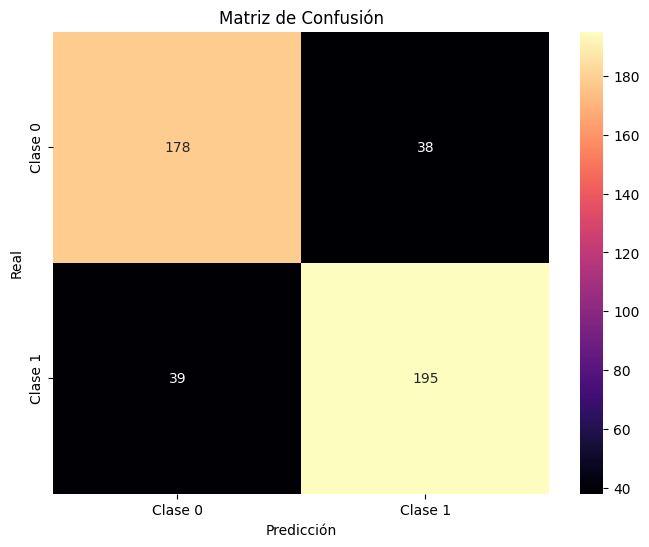


Reporte de Clasificación:
              precision    recall  f1-score   support

     Clase 0       0.82      0.82      0.82       216
     Clase 1       0.84      0.83      0.84       234

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.83      0.83      0.83       450



In [55]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Asignar el mejor modelo a una variable
mejor_modelo = modeloLRcount

# Calcular y mostrar la precisión en el conjunto de prueba
test_accuracy = mejor_modelo.score(testEmb, y_test) * 100
print(f'Test-accuracy con el mejor modelo: {test_accuracy:.2f}%')

# Obtener predicciones del conjunto de prueba
predicciones = mejor_modelo.predict(testEmb)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones, labels=[0, 1])

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='magma', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()



# Mostrar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, predicciones, target_names=['Clase 0', 'Clase 1'])
print('\nReporte de Clasificación:')
print(reporte_clasificacion)


# *********** Aquí termina la sección de agregar código *************

# **Pregunta - 10:**



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### Comentarios Finales

En esta actividad, se exploraron los embeddings pre-entrenados de FastText y se compararon con otros modelos de embeddings como word2vec y GloVe. A continuación, se presenta un resumen de los resultados obtenidos y las lecciones aprendidas.

#### Resultados Obtenidos

1. **Precisión del Modelo**: El mejor modelo de regresión logística alcanzó una precisión del 83% en el conjunto de prueba. Este desempeño es satisfactorio, demostrando que los embeddings de FastText son efectivos para capturar la semántica de los textos y mejorar la clasificación.

2. **Matriz de Confusión**: La matriz de confusión mostró que el modelo tiene una buena capacidad para distinguir entre las dos clases, con 178 verdaderos positivos y 195 verdaderos negativos. Sin embargo, hubo 38 falsos positivos y 39 falsos negativos, lo que indica áreas de mejora en la precisión y el recall del modelo.

3. **Reporte de Clasificación**: El reporte de clasificación mostró una precisión, recall y f1-score de aproximadamente 0.83 para ambas clases, lo que refuerza la idea de que el modelo tiene un desempeño equilibrado y robusto.

#### Resumen de lo Aprendido

1. **Uso de Embeddings Pre-entrenados**: Aprendimos a utilizar embeddings pre-entrenados de FastText, lo que nos permitió manejar eficientemente palabras raras y morfológicamente ricas. Esto es especialmente útil en tareas de procesamiento de lenguaje natural donde la diversidad lingüística es alta.

2. **Lematización y Limpieza de Datos**: Se destacó la importancia del preprocesamiento, incluyendo la lematización y la eliminación de stopwords. Estas técnicas son fundamentales para mejorar la calidad de los datos y, por ende, el desempeño del modelo.

3. **Construcción y Evaluación del Modelo**: Utilizamos técnicas de reducción de dimensionalidad y clasificación para evaluar el desempeño del modelo. El uso de t-SNE para visualizar los embeddings nos permitió comprender mejor la distribución de los datos en el espacio vectorial.

4. **Comparación de Modelos de Embeddings**: La tabla comparativa entre FastText, word2vec y GloVe proporcionó una visión clara de las fortalezas y debilidades de cada modelo. FastText se destacó por su manejo de sub-palabras, lo que lo hace robusto frente a palabras fuera del vocabulario (OOV).

5. **Métricas de Evaluación**: La comprensión y el uso de métricas como precisión, recall, f1-score y la matriz de confusión fueron cruciales para evaluar y mejorar el modelo. Estas métricas nos ayudaron a identificar las áreas donde el modelo tiene un buen desempeño y donde puede mejorarse.

En conclusión, esta actividad nos permitió profundizar en el uso de embeddings pre-entrenados, entender la importancia del preprocesamiento de datos y aprender a evaluar modelos de clasificación utilizando diversas métricas. Los resultados obtenidos demuestran la eficacia de FastText en tareas de clasificación de textos y nos brindan una sólida base para futuras aplicaciones en procesamiento de lenguaje natural.


### ++++++++ Termina la sección de agregar texto: +++++++++++

## **Fin de la Actividad de vectores Embebidos - FastText**